In [1]:
import qiskit as q

In [2]:
X = q.QuantumRegister(3, "x")
J = q.QuantumRegister(3, "j")
A = q.QuantumRegister(9, "a")
R = q.QuantumRegister(1, "r")

In [3]:
cx = q.ClassicalRegister(3)
cj = q.ClassicalRegister(3)
ca = q.ClassicalRegister(9)
cr = q.ClassicalRegister(1)

In [4]:
c = q.QuantumCircuit(X, J, A, R)

$$
\begin{align*}
    A_0 &= (X_0 == J_0) = \neg ( X_0 \oplus J_0)\\
    A_1 &= (X_0 > J_0) =  X_0 \wedge(\neg J_0)\\
    A_2 &= (X_1 == J_1)\\
    A_3 &= (X_1 > J_1)\\
    A_4 &= (X_2 \ge J_2) = X_2 \vee (\neg J_2) = \neg((\neg X_2) \wedge J_2)\\
    A_5 &= A_0 \wedge A_3\\
    A_6 &= A_0 \wedge A_2\\
    A_7 &= A_6 \wedge A_4\\
    A_8 &= A_1 \vee A_5 = \neg((\neg A_1) \wedge (\neg A_5))\\
    A_9 &= A_8 \vee A_7 = X > J\\
\end{align*}
$$

In [5]:

# A0 = (X0 == J0)
c.cx(X[0], A[0])
c.cx(J[0], A[0])
c.x(A[0])


# A1 = (X0 > J0)
c.x(J[0])
c.ccx(X[0],J[0], A[1])
c.x(J[0])


# A2 = (X1 == J1)
c.cx(X[1], A[2])
c.cx(J[1], A[2])
c.x(A[2])


# A3 = (X1 > J1)
c.x(J[1])
c.ccx(X[1],J[1], A[3])
c.x(J[1])


# A4 = (X2 >= J2)
c.x(A[4])
c.x(X[2])
c.ccx(X[2],J[2], A[4])
c.x(X[2])


# A5 = A0 && A3
c.ccx(A[0], A[3], A[5])


# A6 = A0 && A2
c.ccx(A[0], A[2], A[6])


# A7 = A6 && A4
c.ccx(A[6], A[4], A[7])


# A8 = A1 || A5
c.x(A[1])
c.x(A[5])
c.x(A[8])
c.ccx(A[1], A[5], A[8])
c.x(A[1])
c.x(A[5])


# R = A8 || A7
c.x(A[8])
c.x(A[7])
c.x(R[0])
c.ccx(A[8], A[7], R[0])
c.x(A[8])
c.x(A[7])

In [6]:
c.x(A[1])
c.x(A[5])
c.ccx(A[1], A[5], A[8])
c.x(A[1])
c.x(A[5])
c.x(A[8])
c.ccx(A[6], A[4], A[7])
c.ccx(A[0], A[2], A[6])
c.ccx(A[0], A[3], A[5])
c.x(X[2])
c.ccx(X[2],J[2], A[4])
c.x(A[4])
c.x(X[2])
c.x(J[1])
c.ccx(X[1],J[1], A[3])
c.x(J[1])
c.x(A[2])
c.cx(X[1], A[2])
c.cx(J[1], A[2])
c.x(J[0])
c.ccx(X[0],J[0], A[1])
c.x(J[0])
c.x(A[0])
c.cx(X[0], A[0])
c.cx(J[0], A[0])

In [7]:
c = q.compiler.transpile(c)

In [8]:
c.draw(output="mpl")

<Figure size 1923.06x2784.25 with 1 Axes>

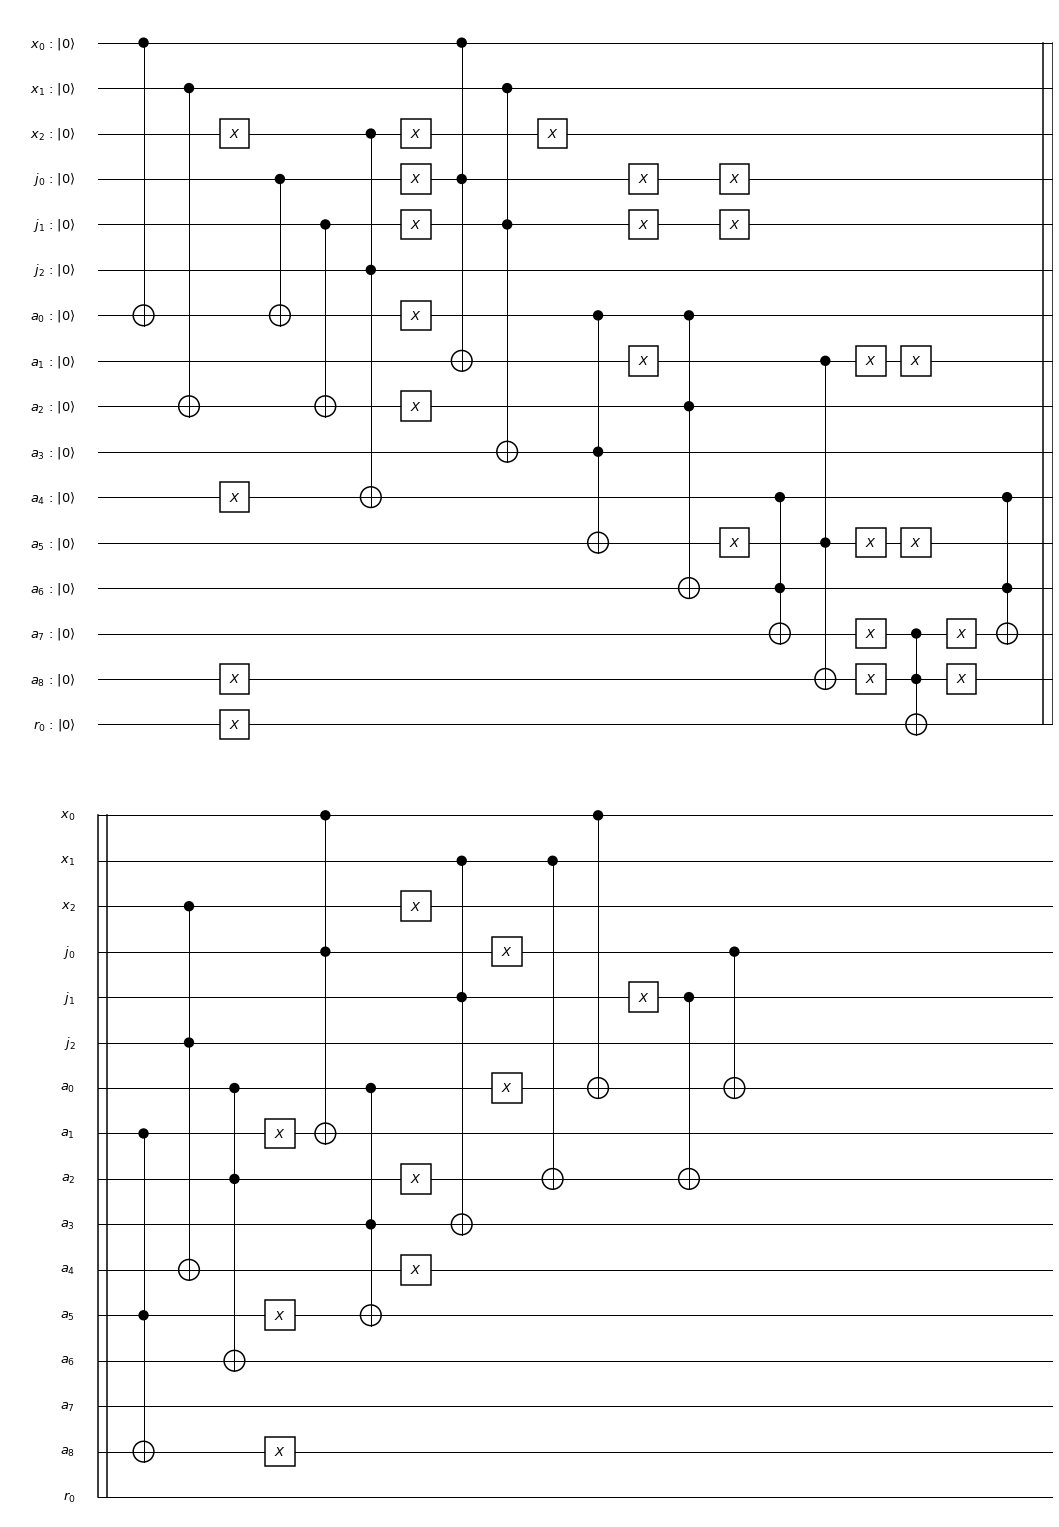

In [9]:
c.draw(output="mpl")

In [10]:
print(c.draw(output="latex_source"))

% \documentclass[preview]{standalone}
% If the image is too large to fit on this documentclass use
\documentclass[draft]{beamer}
% img_width = 16, img_depth = 36
\usepackage[size=custom,height=24,width=57,scale=0.7]{beamerposter}
% instead and customize the height and width (in cm) to fit.
% Large images may run out of memory quickly.
% To fix this use the LuaLaTeX compiler, which dynamically
% allocates memory.
\usepackage[braket, qm]{qcircuit}
\usepackage{amsmath}
\pdfmapfile{+sansmathaccent.map}
% \usepackage[landscape]{geometry}
% Comment out the above line if using the beamer documentclass.
\begin{document}
\begin{equation*}
    \Qcircuit @C=0.5em @R=1.0em @!R {
	 	\lstick{x_{0}: \ket{0}} & \ctrl{6} & \qw & \qw & \qw & \qw & \qw & \qw & \ctrl{3} & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \ctrl{3} & \qw & \qw & \qw & \qw & \qw & \ctrl{6} & \qw & \qw & \qw & \qw & \qw\\
	 	\lstick{x_{1}: \ket{0}} & \qw & \ctrl{7} & \qw & \qw & \

In [11]:
c.add_register(cx)
c.add_register(cj)
c.add_register(ca)
c.add_register(cr)

In [12]:
c.measure(X, cx)
c.measure(J, cj)
c.measure(A, ca)
c.measure(R, cr)

In [13]:
backend_sim = q.BasicAer.get_backend('qasm_simulator')
qobj = q.compiler.transpile(c)
results = q.execute(qobj, backend_sim).result().get_counts(c)

In [14]:
results

{'1 000000000 000 000': 1024}

In [15]:
[["X", "J", "A", "R"]] + sorted([x[::-1].split(" ") for x in results.keys()])

[['X', 'J', 'A', 'R'], ['000', '000', '000000000', '1']]

# Debug

In [16]:
def print_qbit(results, n):
    print("".join(x[2][n] for x in (sorted([x[::-1].split(" ") for x in results.keys()]))))

In [17]:
# A0 = (X0 == J0)
print_qbit(results, 0)

0


In [18]:
# A1 = (X0 > J0)
print_qbit(results, 1)

0


In [19]:
# A2 = (X1 == J1)
print_qbit(results, 2)

0


In [20]:
# A3 = (X1 > J1)
print_qbit(results, 3)

0


In [21]:
# A4 = (X2 > J2)
print_qbit(results, 4)

0


In [22]:
# A5 = A0 && A3
print_qbit(results, 5)

0


In [23]:
# A6 = A0 && A2
print_qbit(results, 6)

0


In [24]:
# A7 = A6 && A4
print_qbit(results, 7)

0


In [25]:
# A8 = A1 || A5
print_qbit(results, 8)

0
